## 水果检测推理结果处理

In [2]:
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns

In [3]:
os.chdir('/home/snnu/chenkequan/paperExper/yolov5')

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 256.30it/s]


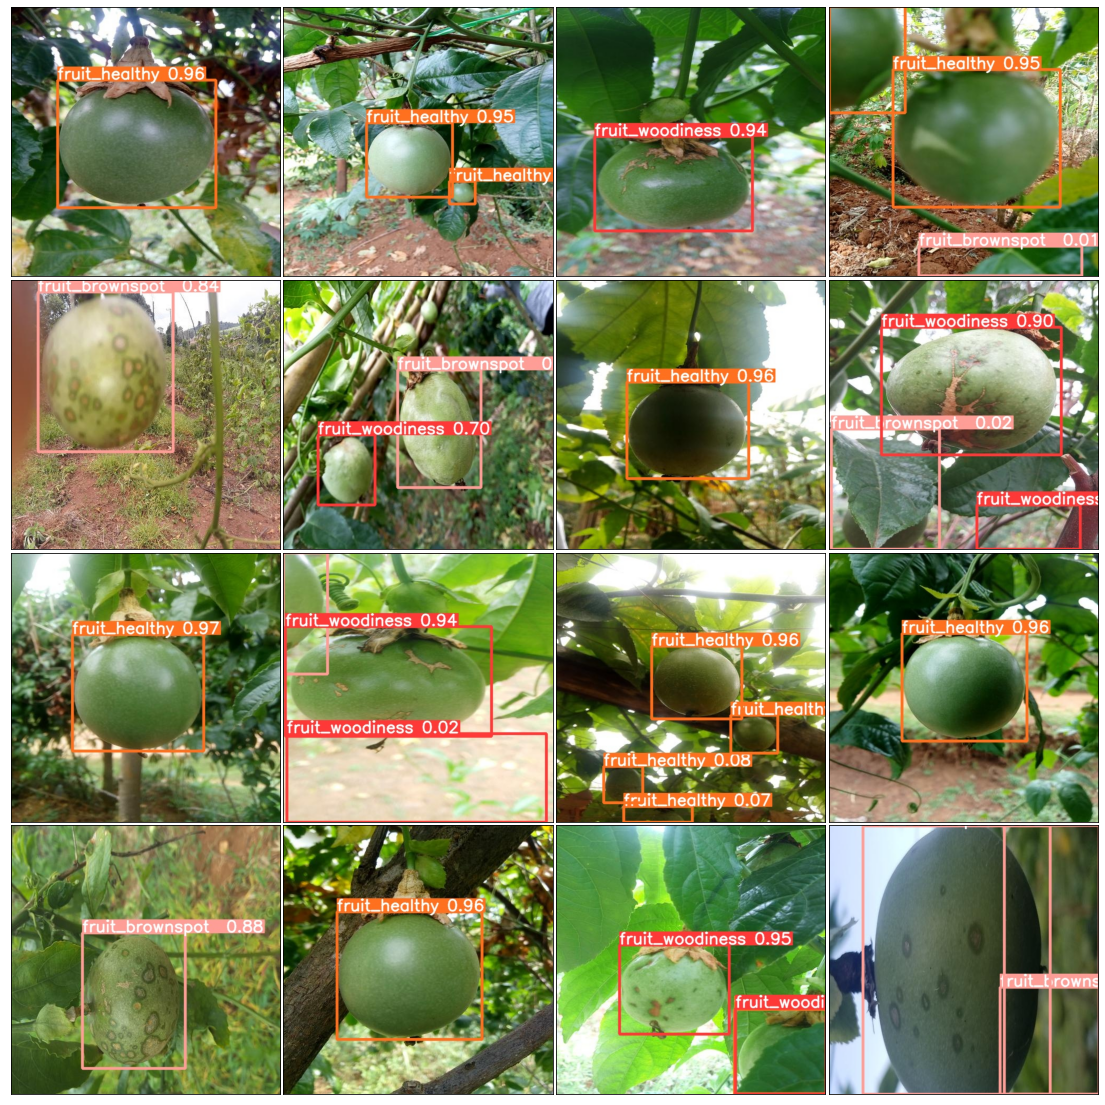

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 314.60it/s]


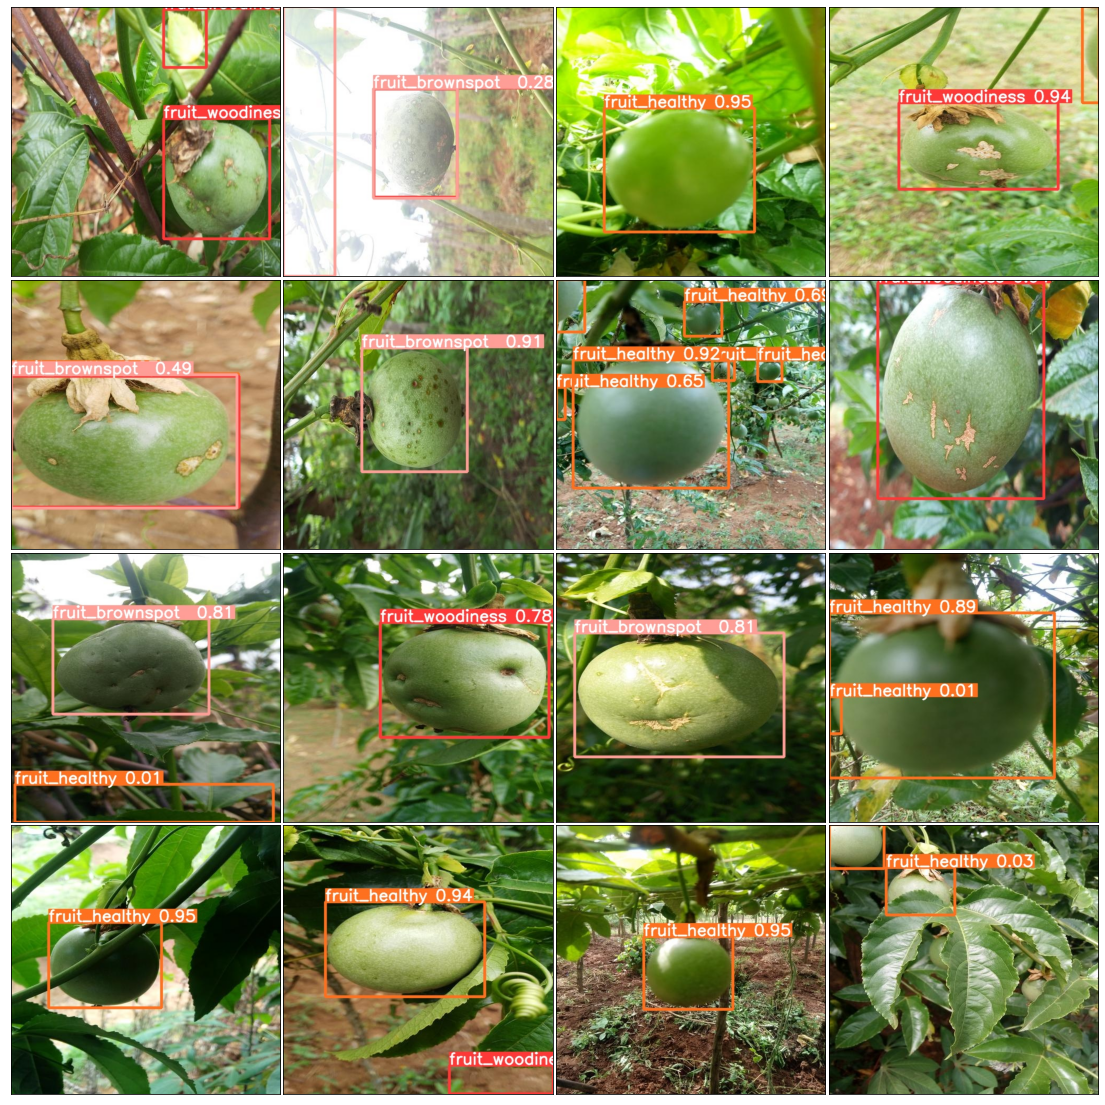

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 338.72it/s]


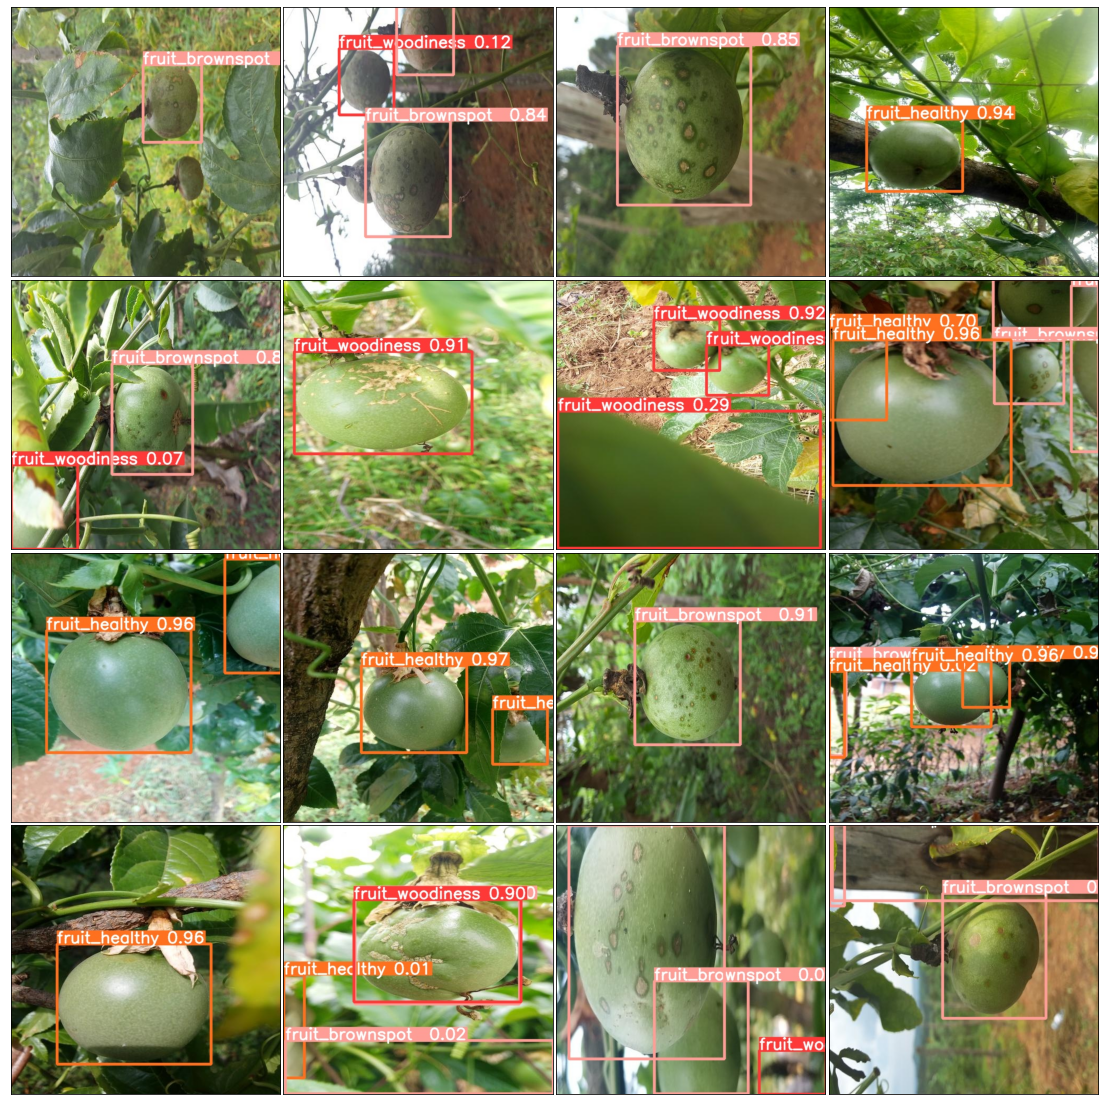

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random
import cv2
from glob import glob
from tqdm import tqdm

files = glob('runs/detect/exp/*.jpg')
for _ in range(3):
    row = 4
    col = 4
    grid_files = random.sample(files,row*col)
    images = []
    for image_path in tqdm(grid_files):
        img = cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
        images.append(img)
    fig = plt.figure(figsize=(col*5,row*5))
    grid = ImageGrid(fig,111,
                    nrows_ncols=(col,row),
                    axes_pad=0.05,)
    for ax,im in zip(grid,images):
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [33]:
import torch
def xywh2xyxy(img_h,img_w,x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    print(y)
    y[:, 0] = img_w * (x[:, 0] - x[:, 2] / 2)  # top left x
    y[:, 1] = img_h * (x[:, 1] - x[:, 3] / 2)  # top left y
    y[:, 2] = img_w * (x[:, 0] + x[:, 2] / 2)  # bottom right x
    y[:, 3] = img_h * (x[:, 1] + x[:, 3] / 2)  # bottom right y
    return y

In [66]:
image_names = []
class_id  = []
conf = []
xminboxes = []
yminboxes = []
xmaxboxes = []
ymaxboxes = []
class_dict = {0:'fruit_woodiness', 1:'fruit_brownspot', 2:'fruit_healthy'}    
for file_path in tqdm(glob('runs/detect/exp/labels/*txt')):
        image_name= file_path.split('/')[-1].replace('txt','jpg')
        f = open(file_path,'r')
        #在推理的标签中读取数据，先替换换行符，去空格，以空格分割，转浮点型，变形
        data = np.array(f.read().replace('\n',' ').strip().split(' ')).astype(np.float32).reshape(-1,6)      
#         以 标签 置信度 box 排列
        data = data[:,[0,5,1,2,3,4]]
#         data = np.array(data)
#         sort_box = data[np.lexsort(-data[:,::-2].T)][0:4]
        sort_box = data[np.lexsort(-data[:,::-2].T)]
        
#         print(sort_Index)
        #以置信度进行排列
        for box in sort_box:
#             print([list(box[2:])])
            box_xyxy = xywh2xyxy(512,512,np.array([box[2:]]))[0]
#             print(box_xyxy)
            print(image_name.split('.')[0])
            image_names.append(image_name.split('.')[0])
            class_id.append(class_dict[int(box[0])])
            conf.append(box[1])
#             xminboxes.append(box_xyxy[0])
#             yminboxes.append(box_xyxy[1])
#             xmaxboxes.append(box_xyxy[2])
#             ymaxboxes.append(box_xyxy[3])
            
            
            xminboxes.append(box_xyxy[0] if box_xyxy[0]>=0 else 0)
            yminboxes.append(box_xyxy[1] if box_xyxy[1]>=0 else 0)
            xmaxboxes.append(box_xyxy[2] if box_xyxy[2]>=0 else 0)
            ymaxboxes.append(box_xyxy[3] if box_xyxy[3]>=0 else 0)
            
            
            
#         print(data)= data[:,[]]
#         bbox_max = []
#     #选取其中置信度最大的框
#         if len(data)==1 :
#             bbox_max = data[0] 
#         elif len(data)>1:
#             bbox_max = data[0] 
#             for box in data:
#                 if bbox_max[1] < box[1]:
#                      bbox_max = box
#                 print("box",box)
          
        
#         bbox_max = bbox_max[:2]
#         print("bbox_max",bbox_max)

print(len(image_names))
print(len(class_id))
print(len(conf))


 27%|██████████▍                            | 248/931 [00:00<00:00, 1247.22it/s]

[[0.571289 0.28418  0.220703 0.291016]]
ID_UVT1BV5I
[[0.612305 0.739258 0.251953 0.322266]]
ID_UVT1BV5I
[[0.417969 0.113281 0.1875   0.226562]]
ID_UVT1BV5I
[[0.415039 0.108398 0.189453 0.216797]]
ID_UVT1BV5I
[[0.599609 0.739258 0.28125  0.322266]]
ID_UVT1BV5I
[[0.424805 0.604492 0.517578 0.412109]]
ID_4OXFGOGA
[[0.769531  0.948242  0.460938  0.0996094]]
ID_4OXFGOGA
[[0.782227 0.134766 0.431641 0.269531]]
ID_4OXFGOGA
[[0.508789 0.486328 0.419922 0.566406]]
ID_BRFCKCPH
[[0.491211 0.388672 0.416016 0.367188]]
ID_XEQDU0L1
[[0.332031 0.264648 0.230469 0.306641]]
ID_M3V2AUVC
[[0.756836  0.663086  0.0917969 0.103516 ]]
ID_M3V2AUVC
[[0.373047 0.47168  0.472656 0.587891]]
ID_86WK6QMP
[[0.0322266 0.711914  0.0644531 0.576172 ]]
ID_86WK6QMP
[[0.807617 0.163086 0.357422 0.326172]]
ID_86WK6QMP
[[0.808594 0.161133 0.359375 0.322266]]
ID_86WK6QMP
[[0.50293  0.545898 0.314453 0.244141]]
ID_CM597XOK
[[0.0371094 0.87207   0.0742188 0.205078 ]]
ID_CM597XOK
[[0.484375 0.581055 0.390625 0.322266]]
ID_AR13H

 56%|█████████████████████▉                 | 525/931 [00:00<00:00, 1340.88it/s]

[[0.416992 0.493164 0.318359 0.236328]]
ID_T7IPJFIZ
[[0.888672  0.0458984 0.222656  0.0917969]]
ID_T7IPJFIZ
[[0.0644531 0.537109  0.128906  0.433594 ]]
ID_T7IPJFIZ
[[0.555664 0.515625 0.330078 0.433594]]
ID_FLDHVVWK
[[0.510742  0.982422  0.423828  0.0351562]]
ID_FLDHVVWK
[[0.500977 0.519531 0.474609 0.382812]]
ID_G64LJ8RC
[[0.388672 0.361328 0.289062 0.238281]]
ID_G64LJ8RC
[[0.373047 0.363281 0.269531 0.234375]]
ID_G64LJ8RC
[[0.460938 0.388672 0.371094 0.273438]]
ID_U89RE1RR
[[0.895508 0.197266 0.208984 0.394531]]
ID_U89RE1RR
[[0.474609 0.490234 0.535156 0.421875]]
ID_76NLMWL4
[[0.210938 0.460938 0.207031 0.25    ]]
ID_76NLMWL4
[[0.550781 0.521484 0.382812 0.320312]]
ID_CA43TS2K
[[0.103516 0.922852 0.207031 0.146484]]
ID_CA43TS2K
[[0.868164  0.414062  0.0683594 0.0585938]]
ID_CA43TS2K
[[0.228516 0.90918  0.429688 0.181641]]
ID_CA43TS2K
[[0.871094  0.77832   0.0820312 0.0722656]]
ID_CA43TS2K
[[0.582031 0.326172 0.835938 0.503906]]
ID_DPHG4P72
[[0.585938 0.330078 0.828125 0.507812]]
ID_D

 89%|██████████████████████████████████▌    | 824/931 [00:00<00:00, 1424.65it/s]

[[0.554688 0.560547 0.472656 0.554688]]
ID_EYG5WMHY
[[0.542969 0.613281 0.527344 0.449219]]
ID_1U3JOU8Y
[[0.896484 0.447266 0.207031 0.210938]]
ID_1U3JOU8Y
[[0.969727  0.543945  0.0605469 0.330078 ]]
ID_1U3JOU8Y
[[0.443359 0.422852 0.578125 0.353516]]
ID_7P97HYKP
[[0.492188 0.929688 0.957031 0.140625]]
ID_7P97HYKP
[[0.447266 0.589844 0.558594 0.460938]]
ID_MOU8HTKB
[[0.695312 0.90918  0.417969 0.177734]]
ID_MOU8HTKB
[[0.962891  0.374023  0.0742188 0.283203 ]]
ID_MOU8HTKB
[[0.547852 0.470703 0.474609 0.453125]]
ID_UZBEB6KB
[[0.52832  0.476562 0.509766 0.460938]]
ID_UZBEB6KB
[[0.558594 0.485352 0.449219 0.373047]]
ID_PYP2LA1Z
[[0.325195  0.521484  0.0996094 0.148438 ]]
ID_PYP2LA1Z
[[0.0185547 0.476562  0.0371094 0.132812 ]]
ID_PYP2LA1Z
[[0.0195312 0.479492  0.0390625 0.166016 ]]
ID_PYP2LA1Z
[[0.0478516 0.657227  0.0917969 0.0800781]]
ID_PYP2LA1Z
[[0.558594 0.578125 0.421875 0.277344]]
ID_KITUXBWQ
[[0.651367 0.401367 0.197266 0.220703]]
ID_WSEG8HY1
[[0.588867 0.533203 0.216797 0.25    ]]


100%|███████████████████████████████████████| 931/931 [00:00<00:00, 1377.42it/s]


ID_MSLL8E1A
[[0.514648 0.623047 0.552734 0.488281]]
ID_P78DB67S
[[0.706055 0.253906 0.533203 0.382812]]
ID_P78DB67S
[[0.604492 0.367188 0.474609 0.65625 ]]
ID_MK5P4MLP
[[0.146484 0.170898 0.292969 0.341797]]
ID_MK5P4MLP
[[0.832031 0.150391 0.335938 0.300781]]
ID_MK5P4MLP
[[0.458984 0.525391 0.347656 0.292969]]
ID_3WU7TSZ3
[[0.723633 0.435547 0.318359 0.269531]]
ID_3WU7TSZ3
[[0.295898 0.598633 0.240234 0.216797]]
ID_3WU7TSZ3
[[0.358398 0.725586 0.201172 0.150391]]
ID_3WU7TSZ3
[[0.231445  0.0498047 0.369141  0.0957031]]
ID_3WU7TSZ3
[[0.0888672 0.665039  0.177734  0.669922 ]]
ID_NQI6J2HN
[[0.413086 0.464844 0.451172 0.574219]]
ID_NQI6J2HN
[[0.510742 0.722656 0.419922 0.546875]]
ID_L4TJ998P
[[0.912109 0.1875   0.175781 0.375   ]]
ID_L4TJ998P
[[0.924805 0.679688 0.150391 0.367188]]
ID_ND4UCAVM
[[0.560547 0.485352 0.546875 0.283203]]
ID_ND4UCAVM
[[0.553711 0.496094 0.556641 0.292969]]
ID_ND4UCAVM
[[0.512695 0.642578 0.458984 0.574219]]
ID_ZAREO6BG
[[0.834961 0.140625 0.201172 0.253906]]
ID_

In [67]:
submit_df = pd.DataFrame({'Image_ID':image_names,'class':class_id,'confidence':conf,'ymin':yminboxes,'xmin':xminboxes,'ymax':ymaxboxes,'xmax':xmaxboxes})

submit_df

Image_ID            class  confidence        ymin        xmin  \
0     ID_UVT1BV5I  fruit_brownspot    0.843946   71.000053  236.000000   
1     ID_UVT1BV5I  fruit_woodiness    0.755729  296.000000  249.000183   
2     ID_UVT1BV5I  fruit_brownspot    0.061978    0.000000  166.000122   
3     ID_UVT1BV5I  fruit_woodiness    0.041418    0.000000  164.000000   
4     ID_UVT1BV5I  fruit_brownspot    0.011609  296.000000  234.999817   
...           ...              ...         ...         ...         ...   
2024  ID_WTPCYEEB  fruit_brownspot    0.078588   70.999817  117.000183   
2025  ID_YBCR1CDE  fruit_woodiness    0.577015   16.000000   35.000061   
2026  ID_YBCR1CDE  fruit_brownspot    0.520199   17.000183   37.000183   
2027  ID_YBCR1CDE  fruit_brownspot    0.123437  236.999939    0.000000   
2028  ID_RPC22N22  fruit_woodiness    0.857900  144.999939   88.999939   

            ymax        xmax  
0     220.000244  348.999939  
1     461.000183  378.000122  
2     115.999741  262.000122  
3     110.999802  260.999939  
4     461.000183  378.999817  
...          ...         ...  
2024  446.999817  375.000061  
2025  279.000061  491.000061  
2026  276.000000  488.999939  
2027  406.999817   30.999989  
2028  432.999939  321.999878  

[2029 rows x 7 columns]

In [47]:
# class_dict = {0:'fruit_woodiness', 1:'fruit_brownspot', 2:'fruit_healthy'}
# def setClass(row):
#     row.class = class_dict[f'{row.class}']
# submit_df1['class'] = submit_df.apply(lambda: row : class_dict[row.class],axis=1)
# submit_df1

SyntaxError: invalid syntax (1881245876.py, line 3)

In [69]:
submit_df.to_csv('./submint.csv',index=False)